## Image processing
## Course work 2 (Part 1) 
### María Cristina Velázquez Garcia
### María Fernanda Zavala López

### Instructions

**Combination of images using Laplacian pyramids**

In your written report, please describe every step in your processes in great detail (including the 
creation of your image mask), include figures. Share the whole process followed (errors included), 
your resources, research, findings, outcomes, lessons, conclusions, etc.

**Part 1**

Given 2 input gray-scale images, create a binary image mask and blend the images in a seamless 
way. The gray-scale resulting image should show a smooth transition between the two images(from 
side to side). 40 pts.

Find a visual guideline for this task below.

![](img1.jpg)

### Theory

**Why to use Laplacian pyramids?**

A Laplacian Pyramid is a linear invertible image representation consisting of a set of band-pass images, spaced an octave apart, plus a low-frequency residual. Formally, let *d(I)* be a downsampling operation which blurs and decimates a *j x j* image *I*, so that *d(I)* is a new image of size *j|2 x j|2* . Also, let *u(.)* be an upsampling operator which smooths and expands  to be twice the size, so *u(I)* is a new image of size *2j x 2j*. We first build a Gaussian pyramid *G(I) = [I0, I1,...,Ik]* ,where *I0 = I* and *Ik* is *k* repeated applications∗ of *d(.)* to *I*.*K* is the number of levels in the pyramid, selected so that the final level has very small spatial extent (<= 8 x 8 pixels).

The coefficients *hk* at each level *k* of the Laplacian pyramid *L(I)* are constructed by taking the difference between adjacent levels in the Gaussian pyramid, upsampling the smaller one with *u(.)* so that the sizes are compatible:

![](img3.jpg)

Intuitively, each level captures image structure present at a particular scale. The final level of the Laplacian pyramid *hK* is not a difference image, but a low-frequency residual equal to the final Gaussian pyramid level, i.e. *hK = IK*. Reconstruction from a Laplacian pyramid coefficients *[h1,...,hK]* is performed using the backward recurrence:

![](img4.jpg)

which is started with *IK = hK* and the reconstructed image being *I = I*. In other words, starting at the coarsest level, we repeatedly upsample and add the difference image h at the next finer level until we get back to the full resolution image.


The Laplacian is essentially a high pass filter. It captures only the details and edges of the images. Intuitively, we can image that subtracting a smoothed image with no details from an image with details, will leave only the details.

**Why to use Gaussian pyramids?**

The Laplacian pyramid builds from the Gaussian pyramid. The Gaussian pyramid serves to represent information, in this case an image, at different scales, at each of which the information from the original is preserved. In short, the Gaussian pyramid is a sequence of images, starting with the original, the original shrunk by ½, the original shrunk by ¼, and so on. At every transition of the pyramid, we want to downscale the image by a factor of ½.

To reduce the scale of the image by ½, Gaussian pyramids combine smoothing with down-sampling. First, the image is smoothed using a Gaussian filter, and then is down sampled by 1/2. To down sample by ½, just take every other pixel in each row and column.

Smoothing reduces the maximum frequency of image features, and reduces sharp contrasts and fast changes that subsampling-only would miss. Gaussian smoothing the image by convolving it with a Gaussian filter essentially performs a low-pass filter over the image. The purpose of a low pass filter over an image is to retain the low-frequency information (think low contrast locations) within an image, while reducing the high frequency information (think edges). Smoothing removes the edges.

Using the Gaussian pyramid, at each scale, the image size decreases by a factor of 2, and the scale of the aggregate gaussian smoothing filter applied increases by a factor of 2. Simply, the image gets smaller and more blurry at every level of the pyramid.



**Images to use**
![](img2.png)

### Code

In [1]:
#import needed libraries and utilities

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

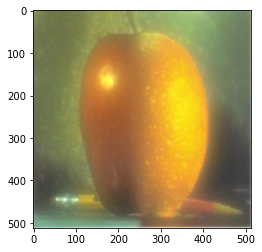

In [2]:
A = cv.imread('manzana.png')
A = cv.cvtColor(A, cv.COLOR_BGR2RGB)
A = cv.resize(A,(512,512))

B = cv.imread('orange.png')
B = cv.resize(B,(512,512))
B = cv.cvtColor(B, cv.COLOR_BGR2RGB)

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)
    
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)
    
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)
    
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)
    
# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
    
# Reconstruct de image to have something to show
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])
    
# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))
plt.imshow(ls_)

### Problems we ran into
- Images where shown in blue tones
    
    *Solution:*
    
    **cv.COLOR_BGR2RGB** --> use this to have the image in the true colors
    
- Some functions like cv.pyrUp or cv.subtract wouldn't work because the parameters didn't have the same dimensions

    *Solution:*
    
    **image_name = cv.resize(image_name,(width_size,height_size))** for all the images used 
    
- When using a normal stack failed with xv::SetSize

    *Solution:*
    
    **use a hstack instead of a normal stack, hstack() function is used to stack the sequence of input arrays horizontally (i.e. column wise) to make a single array, because it would store a tuple**

### References

https://paperswithcode.com/method/laplacian-pyramid

https://becominghuman.ai/image-blending-using-laplacian-pyramids-2f8e9982077f